# TDx Data Pull

**Author:** Eric Englin

**Date:** 10/10/23

**Description:** This code will pull the latest NPS API for the TDx feed. It will create a quick summary figure of the data. 

In [1]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [58]:
#pull API using API key
response_API = requests.get('https://developer.nps.gov/api/v1/roadevents?api_key=3AidKP0PiqgfP8sbwZC0RZ9JM6QDnvYaZx3RRjrH')
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [64]:
import fiona
import geopandas

df_geo = geopandas.GeoDataFrame.from_features(df)
df_geo = df_geo[['geometry','start_date', 'end_date', 'vehicle_impact']] #get an error from some columns
df_geo.to_file('TDX.geojson', driver='GeoJSON')  


In [ ]:
#summarize the data by park
park_list = []
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            park_list.append(y['organization_name'])

park_df = Counter(park_list)
park_df = pd.DataFrame.from_dict(park_df, orient="index").reset_index().rename(
    columns={'index': 'park',
            0:'number of alerts'}).sort_values(by=['number of alerts'])


In [ ]:
# Get today's date as a string
today = datetime.date.today()
today_string = today.strftime('%Y-%m-%d')

park_df['date'] = today_string

In [ ]:
today_string

In [ ]:
len(park_df), sum(park_df['number of alerts']), max(park_df['number of alerts'])

In [ ]:
#create a quick summary figure


# Create the plot
plt.barh(park_df['park'], park_df['number of alerts'])

# Set the title
plt.title("Count of TDx Alerts in NPS API as of " + today_string)

# Show the chart
plt.show()


In [ ]:
import matplotlib.ticker as ticker
import seaborn as sns 

plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


bar_labels = park_df['park']

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
title = "Count of TDx Alerts in NPS API as of " + today_string
ax.set_title(title, fontsize=34)

bars = ax.barh(width = park_df['number of alerts'], y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of TDx Alerts',fontsize = 30) #xlabel
ax.tick_params(axis='x', which='major', labelsize=26)
ax.tick_params(axis='y', which='major', labelsize=26)

plt.xticks(range(1,max(park_df['number of alerts'])+1))

for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)



plt.show()

In [ ]:
# Loop through the API entries
counter=0

park_list = []
alert_name_list = []
description_list = []
event_type_list = []
road_name_list = []
vehicle_impact_list = []
start_date_list = []
end_date_list = []
today_date_list = []
geometry_list = []


for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            print("Park:", y['organization_name'])
            park_list.append(y['organization_name'])
    print("Alert name: ", x['properties']['core_details']['name'])
    print("Description: ", x['properties']['core_details']['description'])
    print("Event type: ", x['properties']['core_details']['event_type'])
    print("Road name: ", x['properties']['core_details']['road_names'])
    print("Vehicle impact: ", x['properties']['vehicle_impact'])
    alert_name_list.append(x['properties']['core_details']['name'])
    description_list.append(x['properties']['core_details']['description'])
    event_type_list.append(x['properties']['core_details']['event_type'])
    road_name_list.append(x['properties']['core_details']['road_names'])
    vehicle_impact_list.append(x['properties']['vehicle_impact'])
    start_date_list.append(x['properties']['start_date'])
    geometry_list.append(x['geometry'])
    try:
        end_date_list.append(x['properties']['end_date'])
        print("Dates: ", x['properties']['start_date'], "to ", x['properties']['end_date'])
    except:
        end_date_list.append("No end date")
        print("Dates: ", x['properties']['start_date'], "to: no end date")
        
    print("")
    today_date_list.append(today_string)
    counter+=1

In [48]:
len(geometry_list)

59

In [49]:
len(park_list)

59

In [50]:
df_update = pd.DataFrame({
    "date":today_date_list,
    "park":park_list,
    "alert name": alert_name_list,
    "description": description_list,
    "event type": event_type_list,
    "road name": road_name_list,
    "vehicle impact": vehicle_impact_list,
    "event start date": start_date_list,
    "event end date": end_date_list
})

In [57]:
len(df_update)

59

In [21]:
df_old_update = pd.read_csv("./TDx_tracker.csv")

In [23]:
df_update = pd.concat([df_update, df_old_update])

In [24]:
df_update.shape

(293, 10)

In [25]:
df_update.columns

Index(['date', 'park', 'alert name', 'description', 'event type', 'road name',
       'vehicle impact', 'event start date', 'event end date', 'geometry'],
      dtype='object')

In [26]:
df_update.groupby('park').count().rename(
    columns={'index': 'park',
            "description":'number of alerts'}).sort_values(by=['number of alerts']).reset_index()



,park,date,alert name,number of alerts,event type,road name,vehicle impact,event start date,event end date,geometry
0,Muir Woods National Monument,2,2,2,2,2,2,2,2,0
1,Valley Forge National Historical Park,6,6,6,6,6,6,6,6,2
2,Death Valley National Park,6,6,6,6,6,6,6,6,2
3,Guadalupe Mountains National Park,6,6,6,6,6,6,6,6,2
4,Organ Pipe Cactus National Monument,6,6,6,6,6,6,6,6,2
5,Golden Gate National Recreation Area,8,8,8,8,8,8,8,8,0
6,Olympic National Park,8,8,8,8,8,8,8,8,0
7,Natchez Trace Parkway,8,8,8,8,8,8,8,8,0
8,Redwood National Park,9,9,9,9,9,9,9,9,3
9,Point Reyes National Seashore,10,10,10,10,10,10,10,10,2


In [27]:
df_update_agg = df_update.groupby('park').count().rename(
    columns={'index': 'park',
            "description":'number of alerts'}).sort_values(by=['number of alerts']).reset_index()


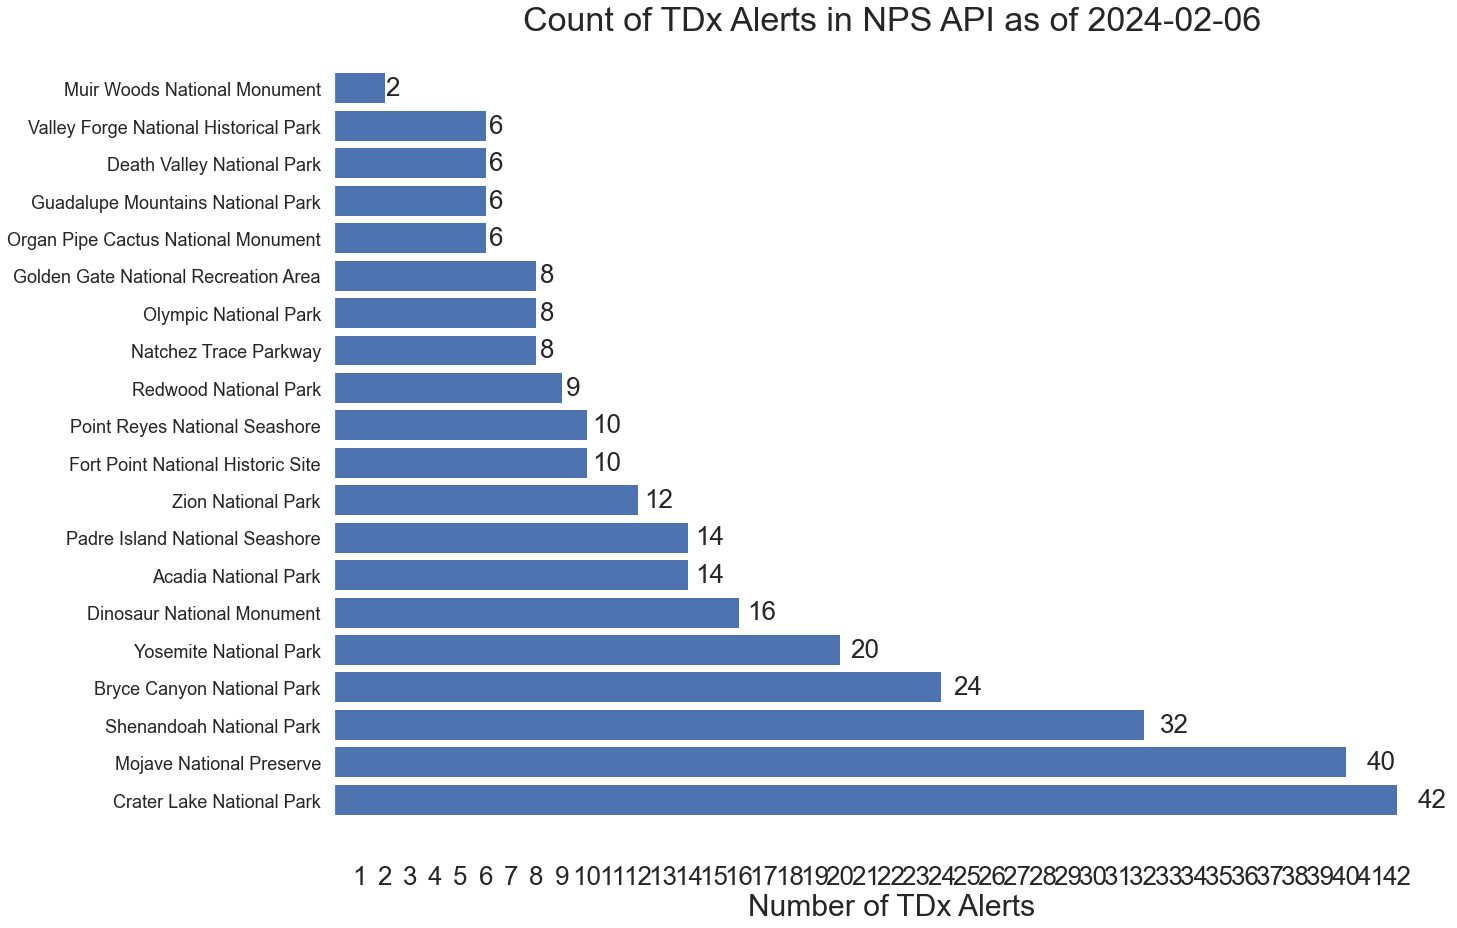

In [28]:
import matplotlib.ticker as ticker
import seaborn as sns 

plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


bar_labels = df_update_agg['park']

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
title = "Count of TDx Alerts in NPS API as of " + today_string
ax.set_title(title, fontsize=34)

bars = ax.barh(width = df_update_agg['number of alerts'], y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of TDx Alerts',fontsize = 30) #xlabel
ax.tick_params(axis='x', which='major', labelsize=26)
ax.tick_params(axis='y', which='major', labelsize=26)

plt.xticks(range(1,max(df_update_agg['number of alerts'])+1))

for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)



plt.show()

In [37]:
df_update.to_csv("./TDx_tracker.csv", index=False)